In [4]:
from stochastic_volatility_models.src.models.rough_bergomi.rough_bergomi import RoughBergomi
from notebook_utils import Notebook

In [12]:
time = "2015-09-01"
nb = Notebook(
	time=time,
	to_fit=False,
	model=RoughBergomi(
		# parameters={'hurst_index': 0.09999997614812506, 'wiener_correlation': -0.9981022684581734, 'volatility_of_volatility': 2.3398647161305863}
		parameters={
			# "hurst_index": 0.2,
			# "hurst_index": 0.7966150308583013,
			# "wiener_correlation": -0.8,
			# "wiener_correlation": -0.9981022680055287,
			# "volatility_of_volatility": 2.34,
			# "volatility_of_volatility": 2.3398652742323254,
			"hurst_index": 0.44087682152945246,
			"wiener_correlation": -0.6676422256997305,
			"volatility_of_volatility": 1.8705813260511173,
		},
	),
)
# nb.model.parameters = {"hurst_index": 0.4997592042171062, "wiener_correlation": -0.009743695826362586, "volatility_of_volatility": 4.461599463421026}
# nb.model.parameters = {"hurst_index": 0.35796990434795445, "wiener_correlation": -0.8575373931521754, "volatility_of_volatility": 2.523310731766046}


# nb.spx_price()

In [13]:
print(nb.model.parameters)
print("w_vol=0: ", nb.evaluate_fit(vol_weight=0.0, skew_weight=0.0))

{'hurst_index': 0.44087682152945246, 'wiener_correlation': -0.6676422256997305, 'volatility_of_volatility': 1.8705813260511173}
w_vol=0:  0.06319170284076273


In [ ]:
nbe = Notebook(
	time=time,
	model=None,
)

In [8]:
from stochastic_volatility_models.visualisations.volatility_surface import plot_volatility_surface_comparison, plot_volatility_surface_error_comparison

config = {
	"toImageButtonOptions": {
		"format": "svg",  # one of png, svg, jpeg, webp
		"filename": "surface",
		"height": 400,
		"width": 600,
		"scale": 1,  # Multiply title/legend/axis/canvas sizes by this factor
	}
}

model = nb.plot_surfaces(volatility=False)
empirical = nbe.plot_surfaces(volatility=False)
plot_volatility_surface_comparison(model, empirical, 0.4).show(config=config)
plot_volatility_surface_error_comparison(model, empirical, 1).show(config=config)
model = nb.plot_surfaces(volatility=True, call=True, price=False)
empirical = nbe.plot_surfaces(volatility=True, call=True, price=False)
plot_volatility_surface_comparison(model, empirical, 0.4).show(config=config)
plot_volatility_surface_error_comparison(model, empirical, 1).show(config=config)

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules/stochastic_volatility_models/stochastic_volatility_models/visualisations/volatility_surface.py:151: RuntimeWarning:

divide by zero encountered in divide

/Users/mayurankv/Documents/Mayuran/Programming/Projects/Academic/Imperial College London/MSc Statistics/Dissertation/Project/modules/stochastic_volatility_models/stochastic_volatility_models/visualisations/volatility_surface.py:151: RuntimeWarning:

invalid value encountered in divide



In [36]:
import plotly.graph_objects as go
import numpy as np

model = nb.plot_surfaces()
empirical = nbe.plot_surfaces()
# model.opacity=0.5

for trace in model.data:
	if isinstance(trace, go.Surface):
		trace.opacity = 0.5
		trace.colorscale = "Viridis"
		model_z = np.array(trace.z)
for trace in empirical.data:
	if isinstance(trace, go.Surface):
		trace.opacity = 0.5
		trace.colorscale = "Viridis"
		empirical_z = np.array(trace.z)
		empirical_y = trace.y
		empirical_x = trace.x
# model.update_traces(opacity=0.5)
# empirical.update_traces(opacity=0.5)
# empirical.data.update(dict(opacity=0.5))

fig = go.Figure(data=model.data + empirical.data)
fig.show()
# model.show()

go.Figure(data=[go.Surface(x=empirical_x, y=empirical_y, z=np.abs((empirical_z - model_z)))], layout=empirical.layout).show()

In [ ]:
nb.plot_surfaces()

In [13]:
nb.plot_surfaces(volatility=True, call=False)

In [15]:
nb.plot_put_call_iv(plot_closeup=False, volatility=True)
nb.plot_iv(plot_closeup=True, volatility=True)
nb.plot_iv(plot_closeup=False, volatility=True)
nb.plot_price(plot_closeup=True, volatility=True)

In [14]:
nb.plot_put_call_iv(plot_closeup=False)
nb.plot_iv(plot_closeup=True)
nb.plot_iv(plot_closeup=False)
nb.plot_price(plot_closeup=True)

In [6]:
nb.plot_strike_iv()
nb.plot_strike_price()

In [7]:
nb.to_fit = True
WEIGHTS = dict(
	skew_weight=0.01,
	vol_weight=0.5,
)
parameters = nb.fit(**WEIGHTS)
print(parameters)

2024-08-21 20:55:19.197 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:126 - Cost is 1.0446664611885423 with parameters {'hurst_index': 0.2, 'wiener_correlation': -0.8, 'volatility_of_volatility': 2.34}
2024-08-21 20:55:48.684 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:126 - Cost is 1.8154335953299048 with parameters {'hurst_index': 0.3495798165462325, 'wiener_correlation': 0.8330449320196617, 'volatility_of_volatility': 4.854594843472904}
2024-08-21 20:56:21.952 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:126 - Cost is 5.249110151490656 with parameters {'hurst_index': 0.11524446538609157, 'wiener_correlation': 0.6962976305315152, 'volatility_of_volatility': 7.268964568154015}
2024-08-21 20:56:56.666 | DEBUG    | stochastic_volatility_models.src.core.calibration:minimise_cost_function:126 - Cost is 9.369733794248829 with parameters {'hurst_index': 0.10138676708477

In [16]:
print(nb.model.parameters)
nb.evaluate_fit(**WEIGHTS)

{'hurst_index': 0.44087682152945246, 'wiener_correlation': -0.6676422256997305, 'volatility_of_volatility': 1.8705813260511173}


0.2453197749010844

`{'hurst_index': 0.44087682152945246, 'wiener_correlation': -0.6676422256997305, 'volatility_of_volatility': 1.8705813260511173}` with vol

Skew 0.01, no vol: {'hurst_index': 0.48952423431957565,
 'wiener_correlation': -0.6671321958811456,
 'volatility_of_volatility': 5.695603755277951}

`{'hurst_index': 0.25819663616567995, 'wiener_correlation': -0.7551652812734636, 'volatility_of_volatility': 1.3113160521173213}`


- No skew or vol

```python
{
	'hurst_index': 0.7966150268203153,
	'wiener_correlation': -0.9981022680055287,
	'volatility_of_volatility': 2.3398652742323254,
}
```

- Skew no vol

```python
{
	'hurst_index': 0.600784070323841,
	'wiener_correlation': -0.9283329233829251,
	'volatility_of_volatility': 6.196125566995583,
}
```

`{'hurst_index': 0.7966150308583013, 'wiener_correlation': -0.9981022283353953, 'volatility_of_volatility': 2.340168649202201}`


Starting at 0.1 H: `{'hurst_index': 0.09999997614812506, 'wiener_correlation': -0.9981022684581734, 'volatility_of_volatility': 2.3398647161305863}`

and again: `{'hurst_index': 0.09999999999845871, 'wiener_correlation': -0.9981022679944431, 'volatility_of_volatility': 2.339867741620785}`

Vol: `{'hurst_index': 0.7999990771709545, 'wiener_correlation': -0.9979980784436497, 'volatility_of_volatility': 2.3400044275737097}`

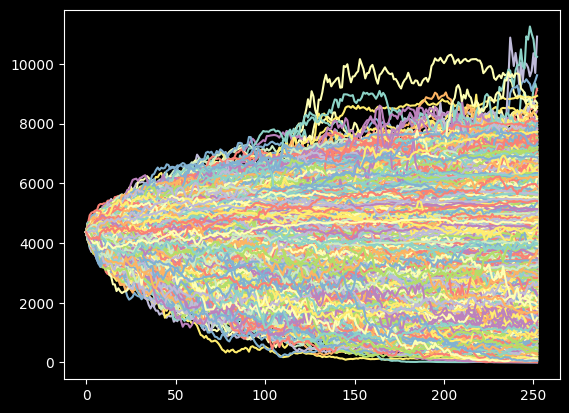

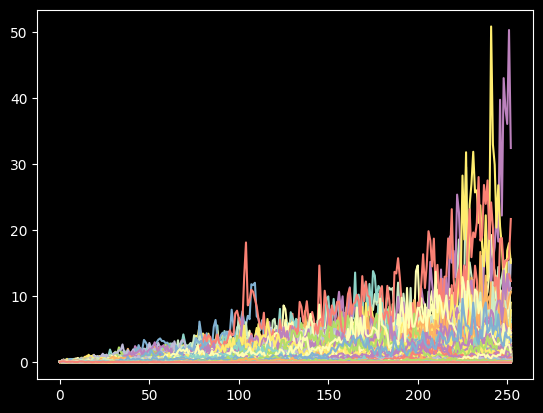

In [9]:
nb.plot_paths(num_show=None)

In [10]:
nb.plot_joint_price(plot_closeup=True)